<a href="https://colab.research.google.com/github/qTronor/BigData_lessons/blob/main/BigData_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn import datasets
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [ ]:
dataset = datasets.load_iris()
data = dataset.data

In [ ]:
models = []
score1 = []
score2 = []

for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++', n_init=10).fit(data.data)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data.data, model.labels_))

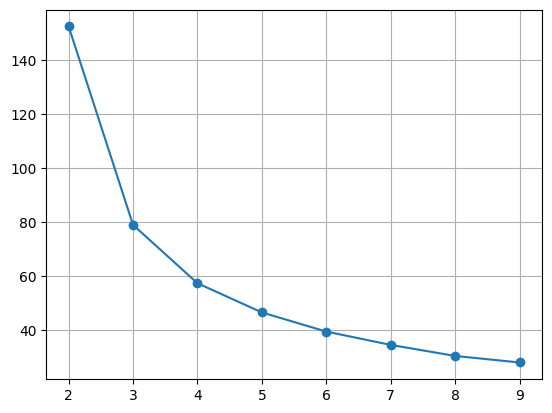

In [ ]:
plt.plot(np.arange(2, 10), score1, marker='o')
plt.grid(True)
plt.show()

По правилу локтя подходящем количеством кластеров будет 3

по следующему графику может быть и 2

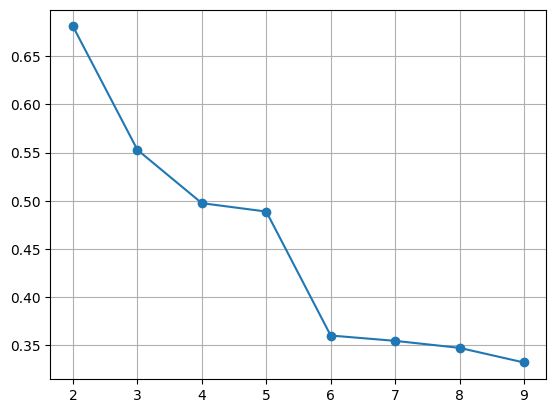

In [ ]:
plt.plot(np.arange(2, 10), score2, marker='o')
plt.grid(True)
plt.show()

In [ ]:
iris_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
iris_df_2 = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [ ]:
model1 = KMeans(n_clusters=3, random_state = 123, init = 'k-means++', n_init = 10)
model1.fit(iris_df)

KMeans(n_clusters=3, n_init=10, random_state=123)

In [ ]:
model1.cluster_centers_

array([[ 6.85000000e+00,  3.07368421e+00,  5.74210526e+00,
         2.07105263e+00, -1.11022302e-16],
       [ 5.00600000e+00,  3.42800000e+00,  1.46200000e+00,
         2.46000000e-01,  1.00000000e+00],
       [ 5.90161290e+00,  2.74838710e+00,  4.39354839e+00,
         1.43387097e+00,  4.83870968e-02]])

In [ ]:
labels = model1.labels_

In [ ]:
iris_df['Cluster'] = labels

In [ ]:
cluster_counts = pd.Series(labels).value_counts()

In [ ]:
print(cluster_counts)

2    62
1    50
0    38
dtype: int64


In [ ]:
#dataset['Cluster'].value_counts()

In [ ]:
fig = go.Figure(data=[
    go.Scatter3d(
        x=iris_df['sepal length (cm)'],
        y=iris_df['sepal width (cm)'],
        z=iris_df['petal length (cm)'],
        mode="markers",
        marker=dict(color=iris_df['Cluster'], size=4, opacity=0.8)
    )
])

fig.update_layout(scene=dict(
                    xaxis_title='Sepal Length (cm)',
                    yaxis_title='Sepal Width (cm)',
                    zaxis_title='Petal Length (cm)'),
                    title='3D Scatter Plot for Iris Dataset')

fig.show()

In [ ]:
model2 = AgglomerativeClustering(3, compute_distances = True)
clastering = model2.fit(iris_df_2)
iris_df_2['Claster'] = clastering.labels_

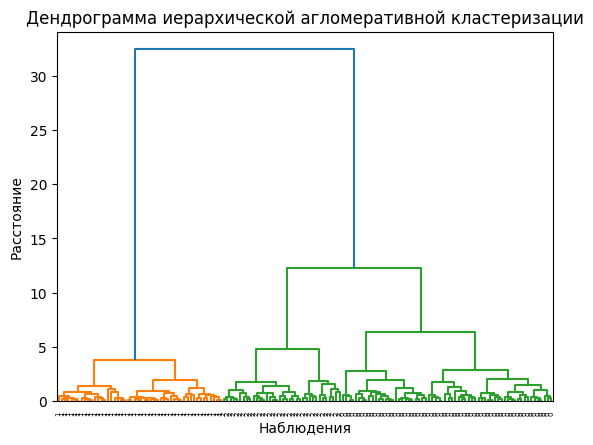

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


data_for_dendrogram = iris_df_2.drop('Claster', axis=1)
linkage_matrix = linkage(data_for_dendrogram, method='ward')
dendrogram(linkage_matrix, labels=iris_df_2['Claster'].values, leaf_rotation=90)

plt.xlabel('Наблюдения')
plt.ylabel('Расстояние')
plt.title('Дендрограмма иерархической агломеративной кластеризации')

plt.show()

In [ ]:
fig = go.Figure(data=[
    go.Scatter3d(
        x=iris_df['sepal length (cm)'],
        y=iris_df['sepal width (cm)'],
        z=iris_df['petal length (cm)'],
        mode="markers",
        marker=dict(color=iris_df_2['Claster'], size=4, opacity=0.8)
    )
])

fig.update_layout(scene=dict(
                    xaxis_title='Sepal Length (cm)',
                    yaxis_title='Sepal Width (cm)',
                    zaxis_title='Petal Length (cm)'),
                    title='3D Scatter Plot for Iris Dataset')

fig.show()

In [ ]:
iris_df_3 = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [ ]:
model3 = DBSCAN(min_samples = 3).fit(iris_df_3)

In [ ]:
iris_df_3['Claster'] = model3.labels_

In [ ]:
fig = go.Figure(data=[
    go.Scatter3d(
        x=iris_df['sepal length (cm)'],
        y=iris_df['sepal width (cm)'],
        z=iris_df['petal length (cm)'],
        mode="markers",
        marker=dict(color=iris_df_3['Claster'], size=4, opacity=0.8)
    )
])

fig.update_layout(scene=dict(
                    xaxis_title='Sepal Length (cm)',
                    yaxis_title='Sepal Width (cm)',
                    zaxis_title='Petal Length (cm)'),
                    title='3D Scatter Plot for Iris Dataset')

fig.show()